# Analyse de séries temporelles : AirPassengers

TP réalisé par :

**WELEHELA TAWEUTEU ORCHELLE PATRICIA**

**NDIAYE BASSIROU SERIGNE**

## **Q1 – Importer le dataset AirPassengers**

Ce dataset contient le nombre mensuel de passagers aériens entre 1949 et 1960.

In [1]:
import pandas as pd

# Charger le dataset depuis seaborn ou un fichier CSV
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)

# Afficher les dimensions
print(f"Dimensions du dataset : {df.shape}")

Dimensions du dataset : (144, 2)


## **Q2 – Afficher les 5 premières lignes**

In [2]:
# Aperçu des premières lignes
print(df.head())

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


## **Q3 – Convertir la colonne 'Month' en index temporel**

In [3]:
# Conversion de la colonne 'Month' en datetime
df['Month'] = pd.to_datetime(df['Month'])

# Définir 'Month' comme index
df.set_index('Month', inplace=True)

# Vérification
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB
None


## **Q4 – Visualiser la série temporelle**

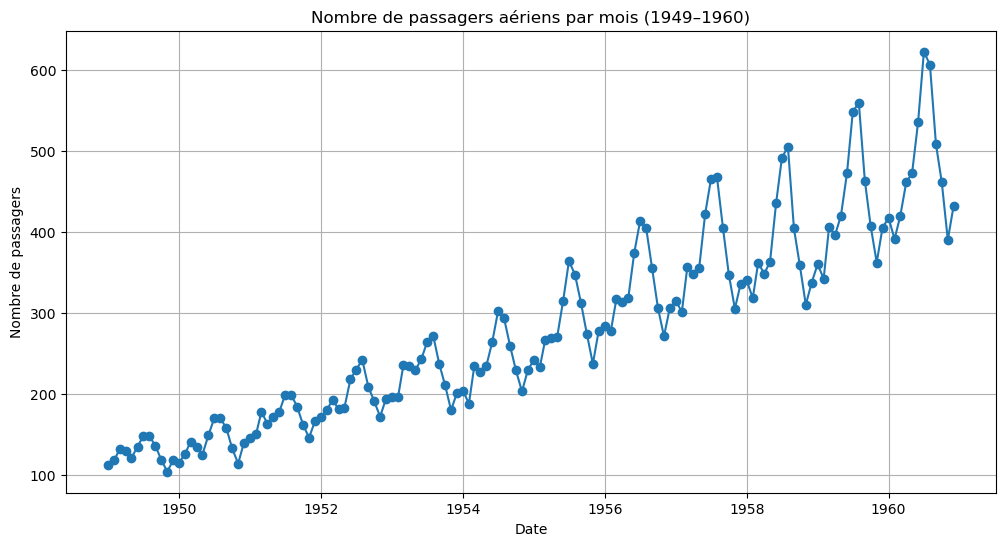

In [4]:
import matplotlib.pyplot as plt

# Tracer la série
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Passengers'], marker='o', linestyle='-')
plt.title("Nombre de passagers aériens par mois (1949–1960)")
plt.xlabel("Date")
plt.ylabel("Nombre de passagers")
plt.grid(True)
plt.show()


## **Q5 – Calculer et tracer une moyenne mobile (fenêtre de 12 mois)**

Lisser la série pour mieux visualiser la tendance en calculant une moyenne glissante sur 12 mois.

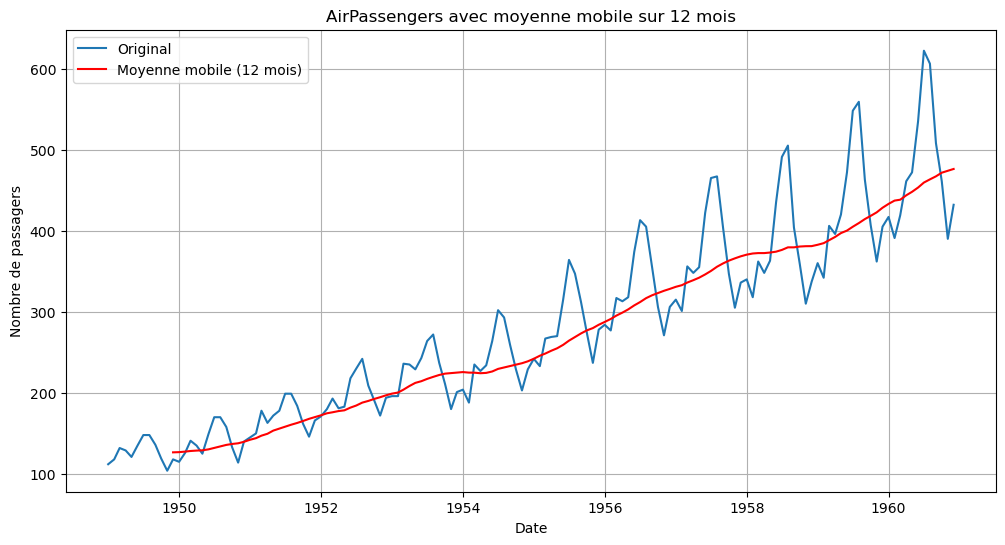

In [5]:
# Calcul de la moyenne mobile sur 12 mois
df['MA_12'] = df['Passengers'].rolling(window=12).mean()

# Visualisation
plt.figure(figsize=(12, 6))
plt.plot(df['Passengers'], label='Original')
plt.plot(df['MA_12'], label='Moyenne mobile (12 mois)', color='red')
plt.title("AirPassengers avec moyenne mobile sur 12 mois")
plt.xlabel("Date")
plt.ylabel("Nombre de passagers")
plt.legend()
plt.grid(True)
plt.show()


## **Q6 – Décomposer la série avec statsmodels**

Séparer la série en trois composantes :

**Tendance** : évolution générale

**Saisonnalité** : motifs récurrents

**Résidus** : bruit ou variations non expliquées

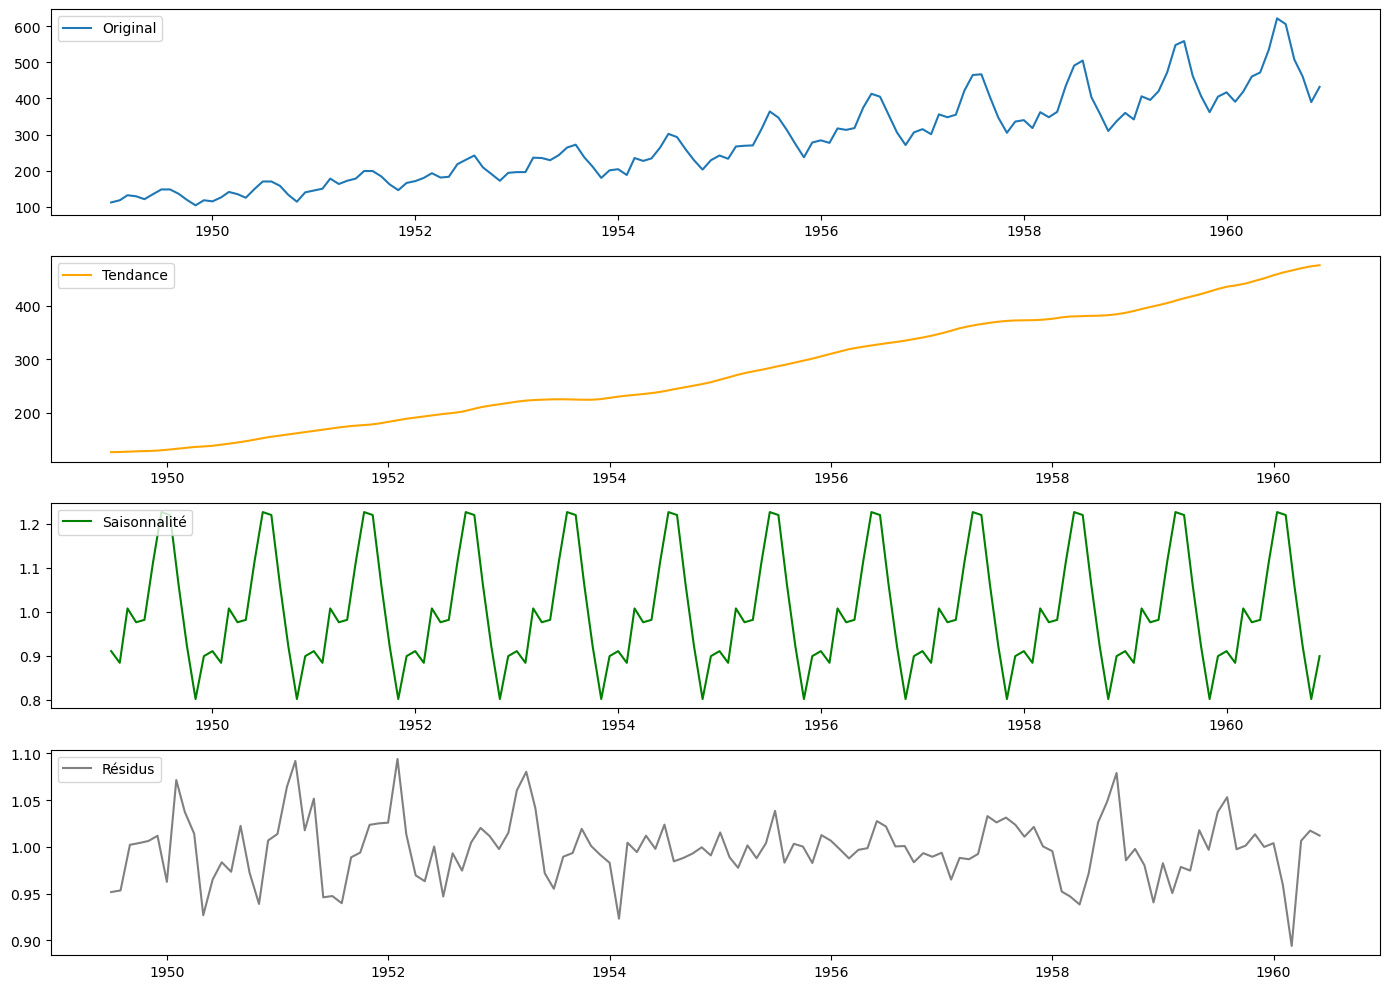

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Décomposition de la série
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

# Visualisation
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(df['Passengers'], label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Tendance', color='orange')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Saisonnalité', color='green')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Résidus', color='grey')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()
